In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

The real estate market is a dynamic and complex sector that requires detailed analysis and insightful visualizations to understand trends and make informed decisions. A well-designed dashboard can comprehensively view market conditions, price trends, inventory levels, and other important metrics.

# Project Overview
* In this project, we’ll create a Real Estate Market Trends Dashboard using R. This dashboard will visualize key metrics such as median home prices, inventory levels, days on market, price per square foot, and sales volume. We will also demonstrate how to build an interactive dashboard using the Shiny package, allowing users to explore the real estate data dynamically.

# Installing and Loading Necessary Libraries
* Before starting, we will install and load the required libraries. R provides a rich set of libraries for data manipulation and visualization, such as Shiny for interactive web applications, ggplot2 for plotting, and dplyr for data manipulation

In [2]:
install.packages(c("ggplot2", "shiny", "dplyr", "scales"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘promises’




# Creating the Dashboard in R
* Below are examples of how to create various components of a real estate market trends dashboard using R.

1. Median Home Prices
* We will create a line chart to show the Median Home Prices.

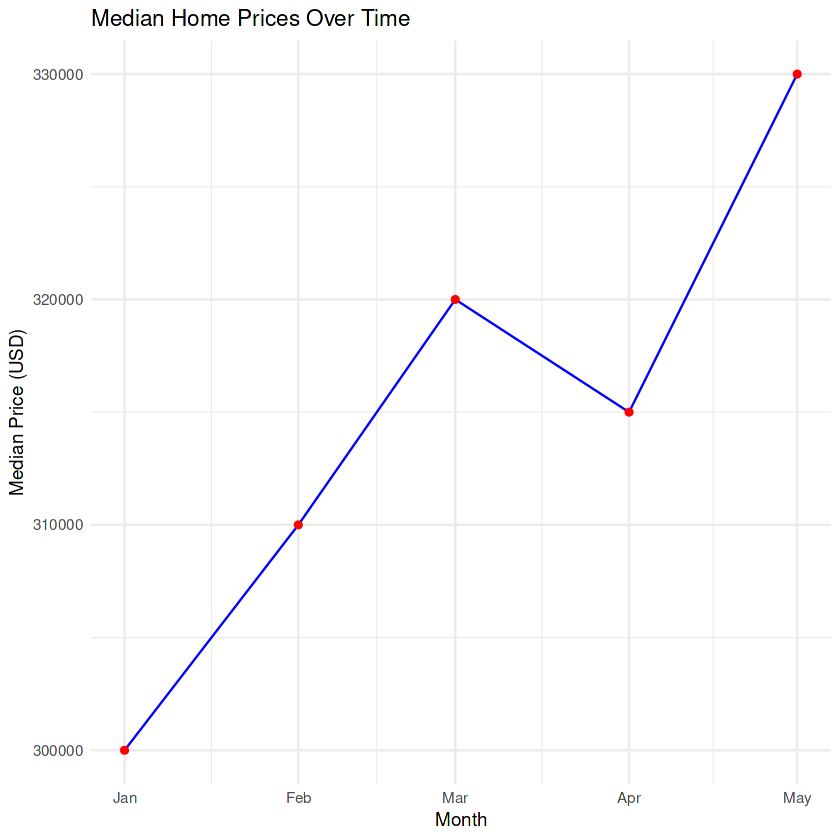

In [3]:
library(ggplot2)

data <- data.frame(
  Month = as.Date(c('2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
                    '2023-05-01')),
  MedianPrice = c(300000, 310000, 320000, 315000, 330000)
)

ggplot(data, aes(x = Month, y = MedianPrice)) +
  geom_line(color = 'blue') +
  geom_point(color = 'red') +
  labs(title = "Median Home Prices Over Time", x = "Month", y = "Median Price (USD)") +
  theme_minimal()

This line chart shows the trend of median home prices over time, helping stakeholders understand how prices are changing month to month.

2. Inventory Levels
* Inventory management is a crucial aspect of supply chain and business operations. Proper management of inventory levels ensures that a company can meet customer demand without overstocking, which ties up capital, or understocking, which leads to missed sales opportunities.

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


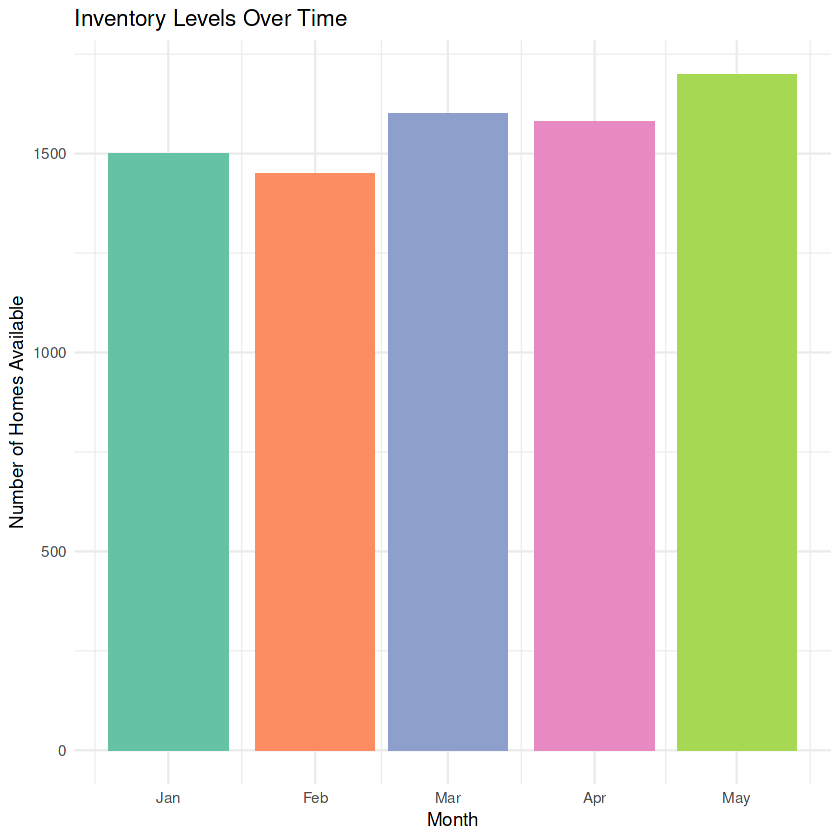

In [5]:
library(ggplot2)

data <- data.frame(
  Month = as.Date(c('2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', 
                    '2023-05-01')),
  Inventory = c(1500, 1450, 1600, 1580, 1700)
)

ggplot(data, aes(x = Month, y = Inventory, fill = factor(Month))) +
  geom_bar(stat = "identity") +
  labs(title = "Inventory Levels Over Time", x = "Month", 
       y = "Number of Homes Available") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2") +  # nice distinct colors
  guides(fill = FALSE)   # remove legend (optional)


This bar chart visualizes the number of homes available for sale over time, providing insights into inventory trends.

3. Days on Market (DOM)
* Days on Market (DOM) is a critical metric in real estate that measures the number of days a property has been listed for sale before it is sold.

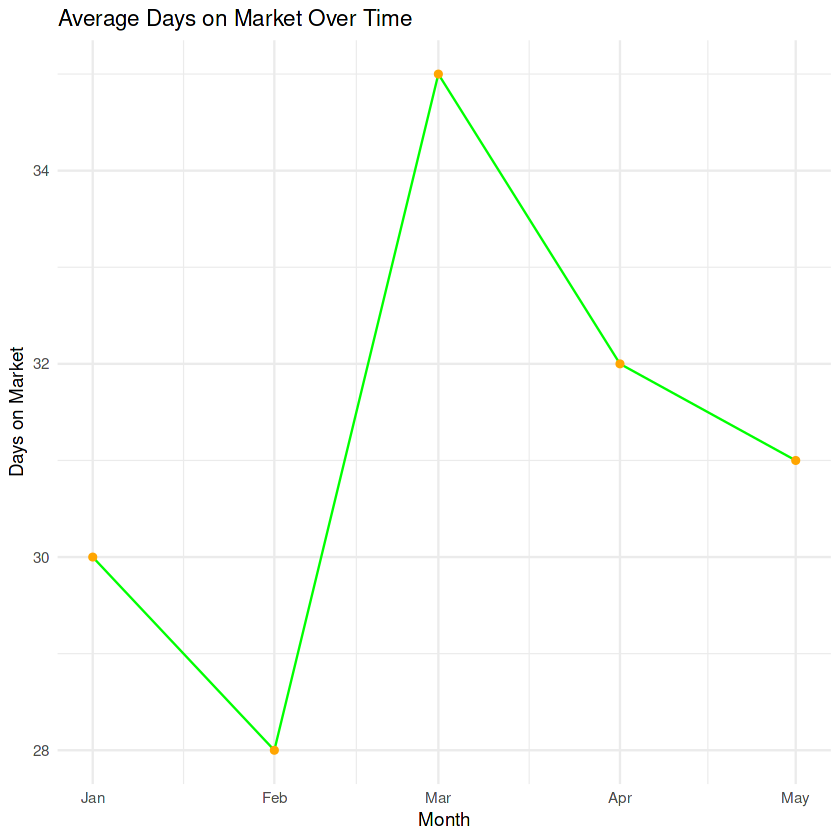

In [6]:
data <- data.frame(
  Month = as.Date(c('2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01')),
  DOM = c(30, 28, 35, 32, 31)
)

ggplot(data, aes(x = Month, y = DOM)) +
  geom_line(color = 'green') +
  geom_point(color = 'orange') +
  labs(title = "Average Days on Market Over Time", x = "Month", y = "Days on Market") +
  theme_minimal()

This line chart shows the average number of days properties remain on the market before being sold, indicating the speed of sales.

4. Price Per Square Foot
* Price per square foot is a commonly used metric in real estate to evaluate the cost of a property relative to its size. This metric helps buyers, sellers, and investors understand the value of a property and make informed decisions

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 19357”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 59.6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 3794.6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 5”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric 

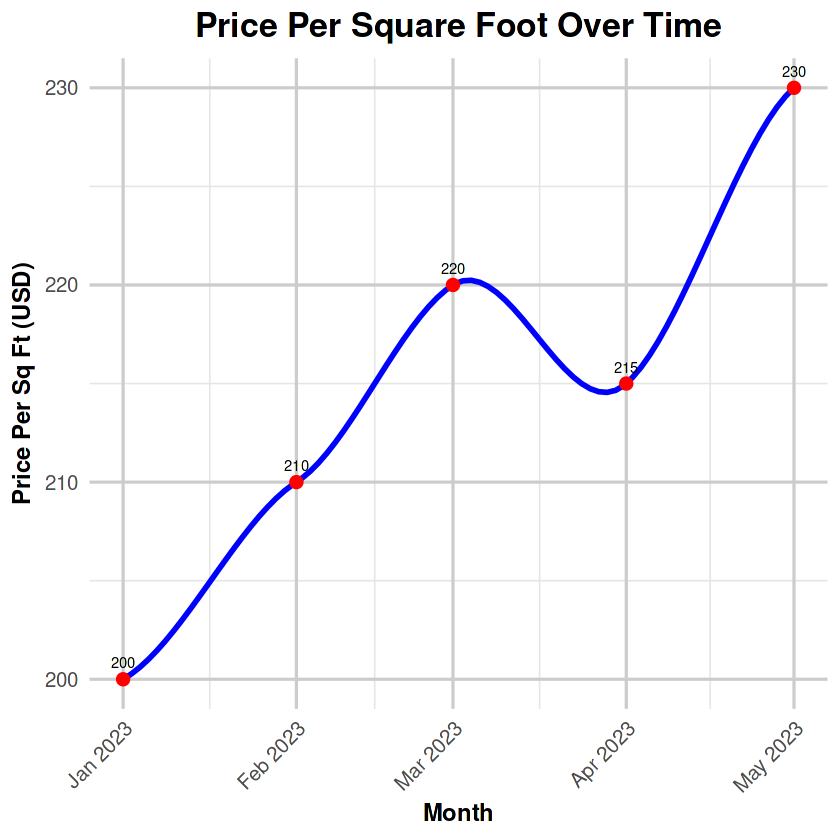

In [8]:
library(ggplot2)

data <- data.frame(
  Month = as.Date(c('2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', 
                    '2023-05-01')),
  PricePerSqFt = c(200, 210, 220, 215, 230)
)

ggplot(data, aes(x = Month, y = PricePerSqFt)) +
  geom_smooth(method = "loess", se = FALSE, color = 'blue', size = 1.2) +
  geom_point(color = 'red', size = 3) +
  geom_text(aes(label = PricePerSqFt), vjust = -1, color = 'black', size = 3) +
  labs(
    title = "Price Per Square Foot Over Time",
    x = "Month",
    y = "Price Per Sq Ft (USD)"
  ) +
  scale_x_date(date_labels = "%b %Y", date_breaks = "1 month") +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    panel.grid.major = element_line(color = "grey80"),
    panel.grid.minor = element_line(color = "grey90")
  )


5. Sales Volume
* To make the sales volume plot we can add enhancements such as customizing the color palette, adding data labels, adjusting the theme for better readability, and incorporating a smoother visual design. Here's an improved version of the plot.

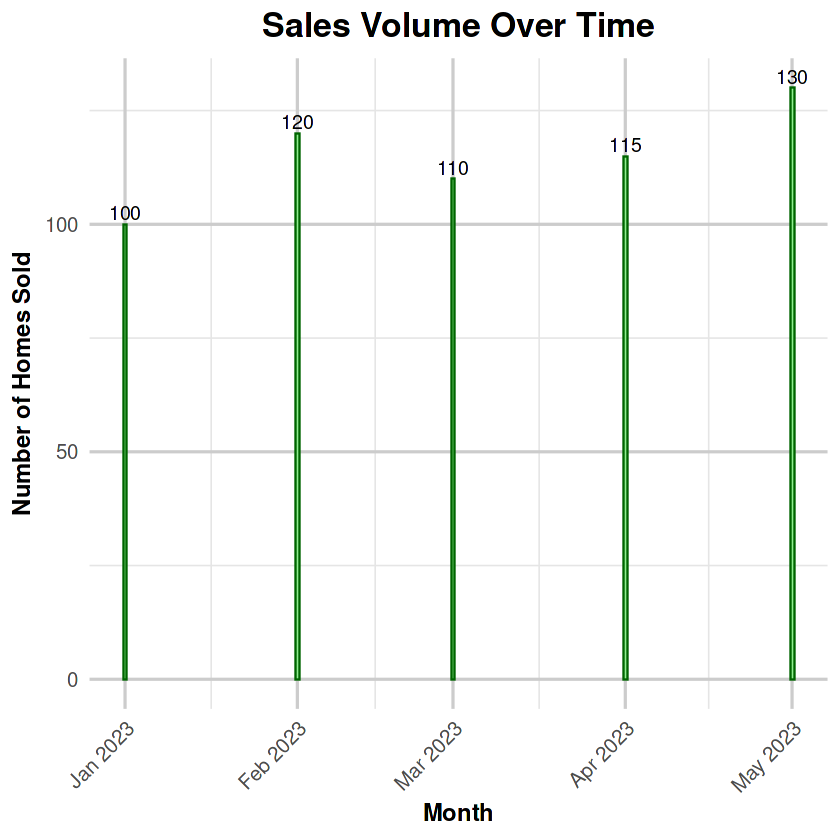

In [10]:
library(ggplot2)


data <- data.frame(
  Month = as.Date(c('2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', 
                    '2023-05-01')),
  SalesVolume = c(100, 120, 110, 115, 130)
)

ggplot(data, aes(x = Month, y = SalesVolume)) +
  geom_bar(stat = "identity", fill = 'lightgreen', color = 'darkgreen', width = 0.7) +
  geom_text(aes(label = SalesVolume), vjust = -0.3, color = 'black', size = 4) +
  labs(
    title = "Sales Volume Over Time",
    x = "Month",
    y = "Number of Homes Sold"
  ) +
  scale_x_date(date_labels = "%b %Y", date_breaks = "1 month") +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 20),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    panel.grid.major = element_line(color = "grey80"),
    panel.grid.minor = element_line(color = "grey90")
  )

6. Interactive Dashboard with Shiny
* To create an interactive dashboard, we can use the shiny package.

In [11]:
library(shiny)
library(ggplot2)

data <- data.frame(
  Month = as.Date(c('2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', 
                    '2023-05-01')),
  MedianPrice = c(300000, 310000, 320000, 315000, 330000),
  Inventory = c(1500, 1450, 1600, 1580, 1700),
  DOM = c(30, 28, 35, 32, 31),
  PricePerSqFt = c(200, 210, 220, 215, 230),
  SalesVolume = c(100, 120, 110, 115, 130)
)
# UI
ui <- fluidPage(
  titlePanel("Real Estate Market Trends Dashboard"),
  sidebarLayout(
    sidebarPanel(
      selectInput("metric", "Choose a metric:", 
                  choices = c("MedianPrice", "Inventory", "DOM", "PricePerSqFt", 
                              "SalesVolume"))
    ),
    mainPanel(
      plotOutput("trendPlot")
    )
  )
)
# Server
server <- function(input, output) {
  output$trendPlot <- renderPlot({
    ggplot(data, aes_string(x = "Month", y = input$metric)) +
      geom_line(color = 'blue') +
      geom_point(color = 'red') +
      labs(title = paste(input$metric, "Over Time"), x = "Month", y = input$metric) +
      theme_minimal()
  })
}

shinyApp(ui = ui, server = server)


Listening on http://127.0.0.1:7897



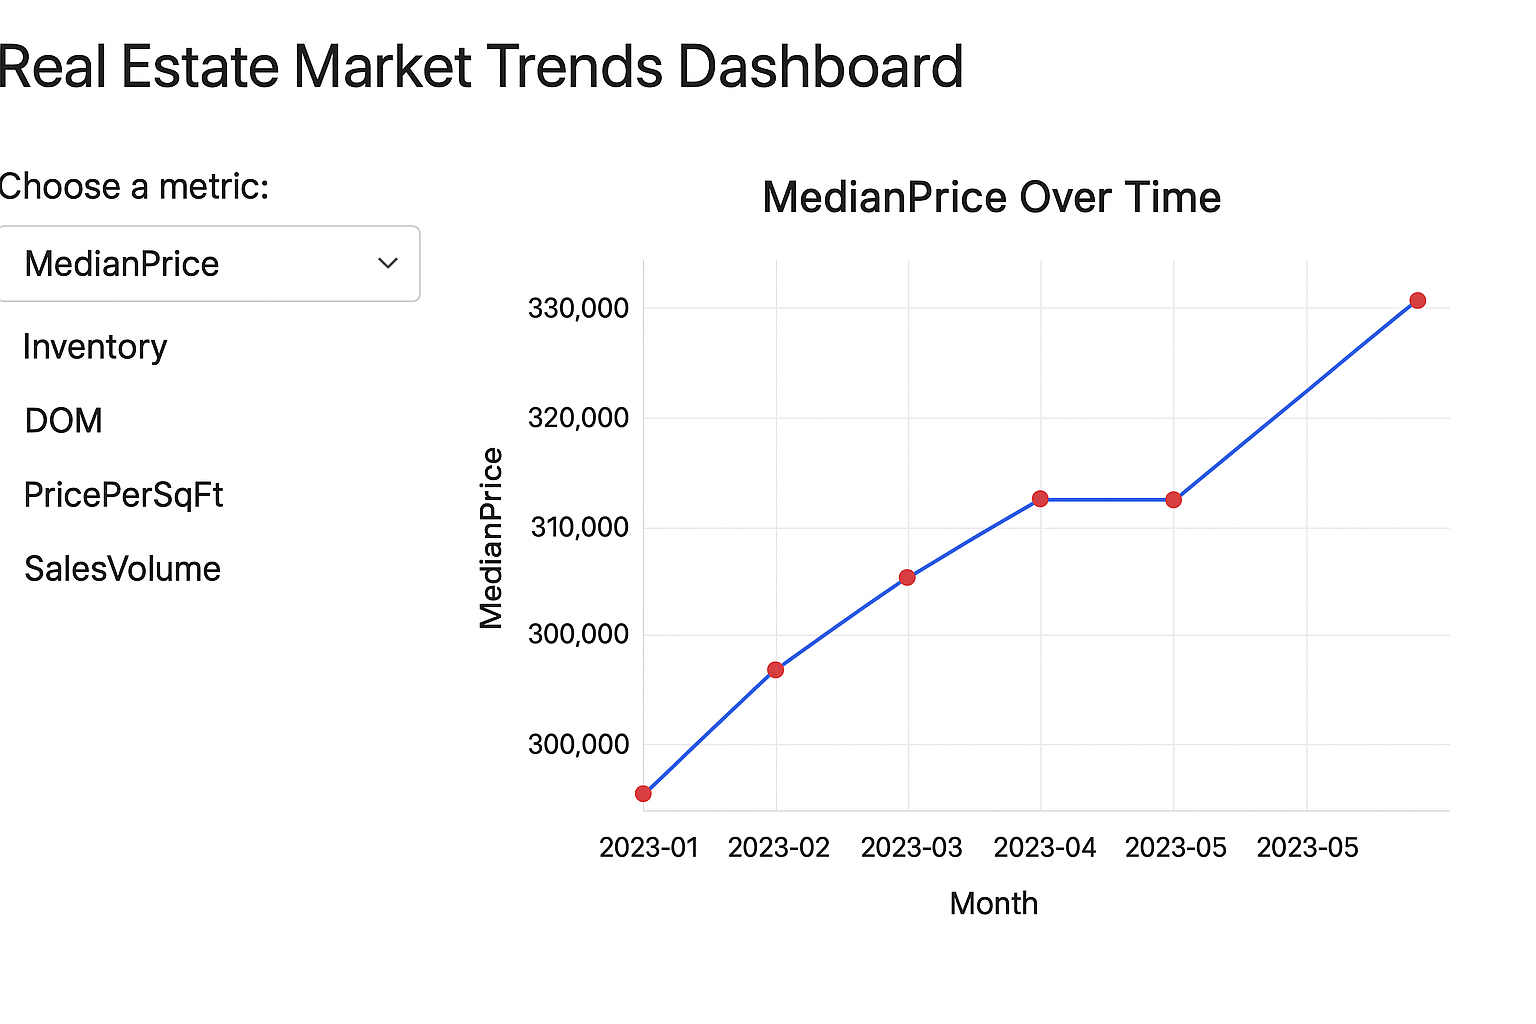
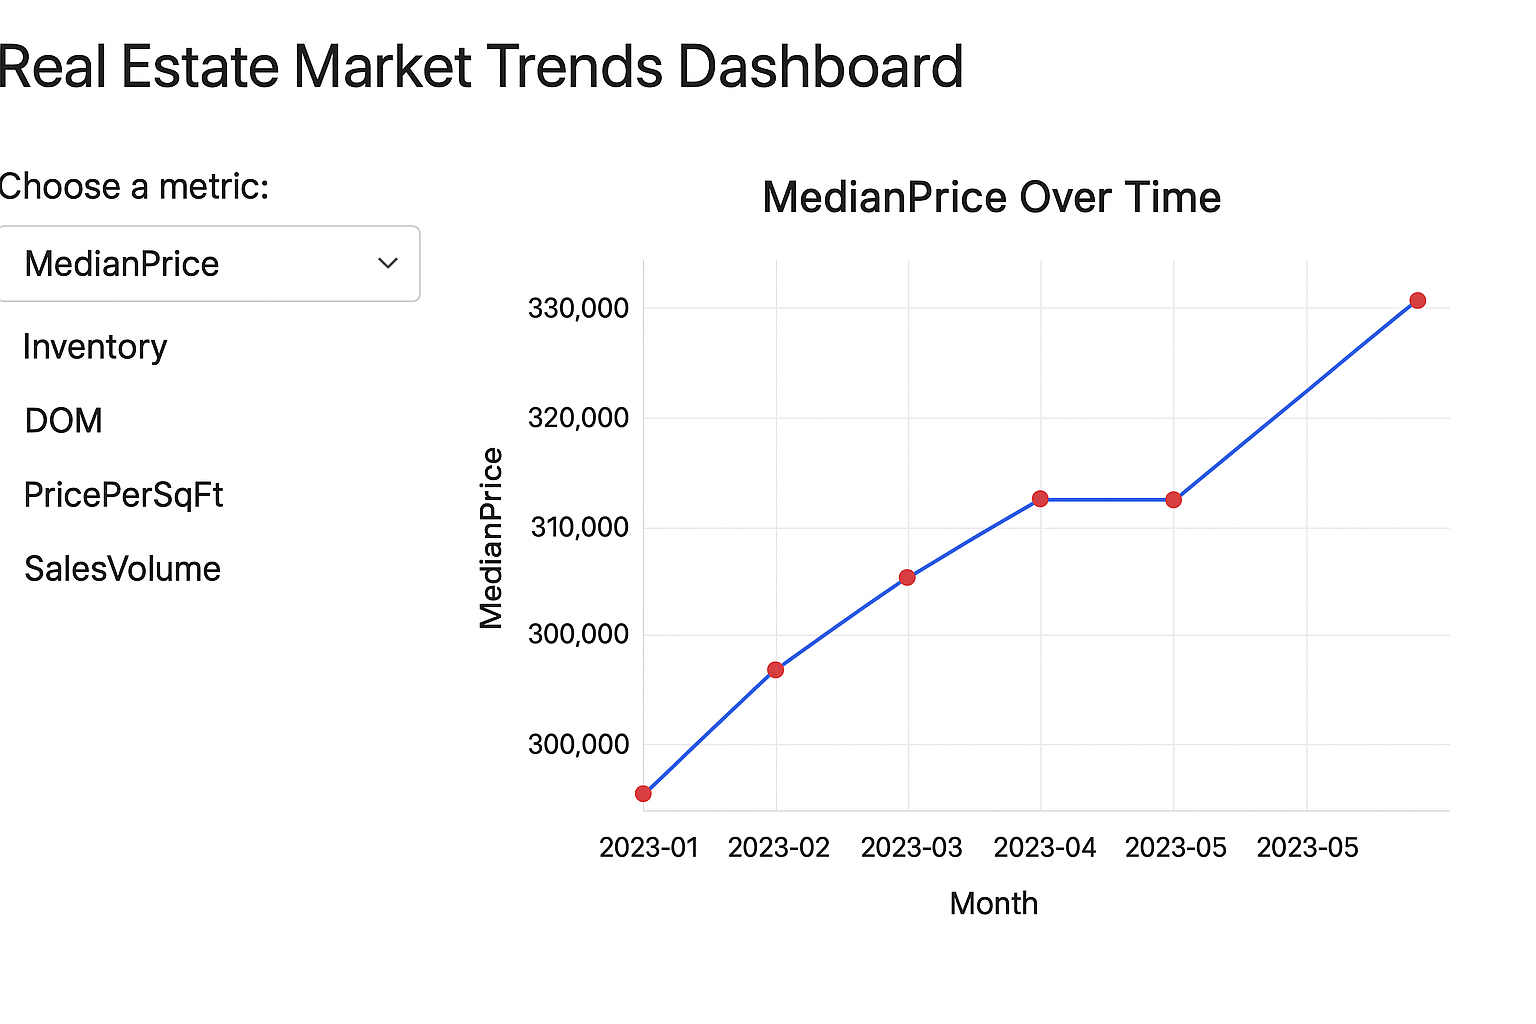
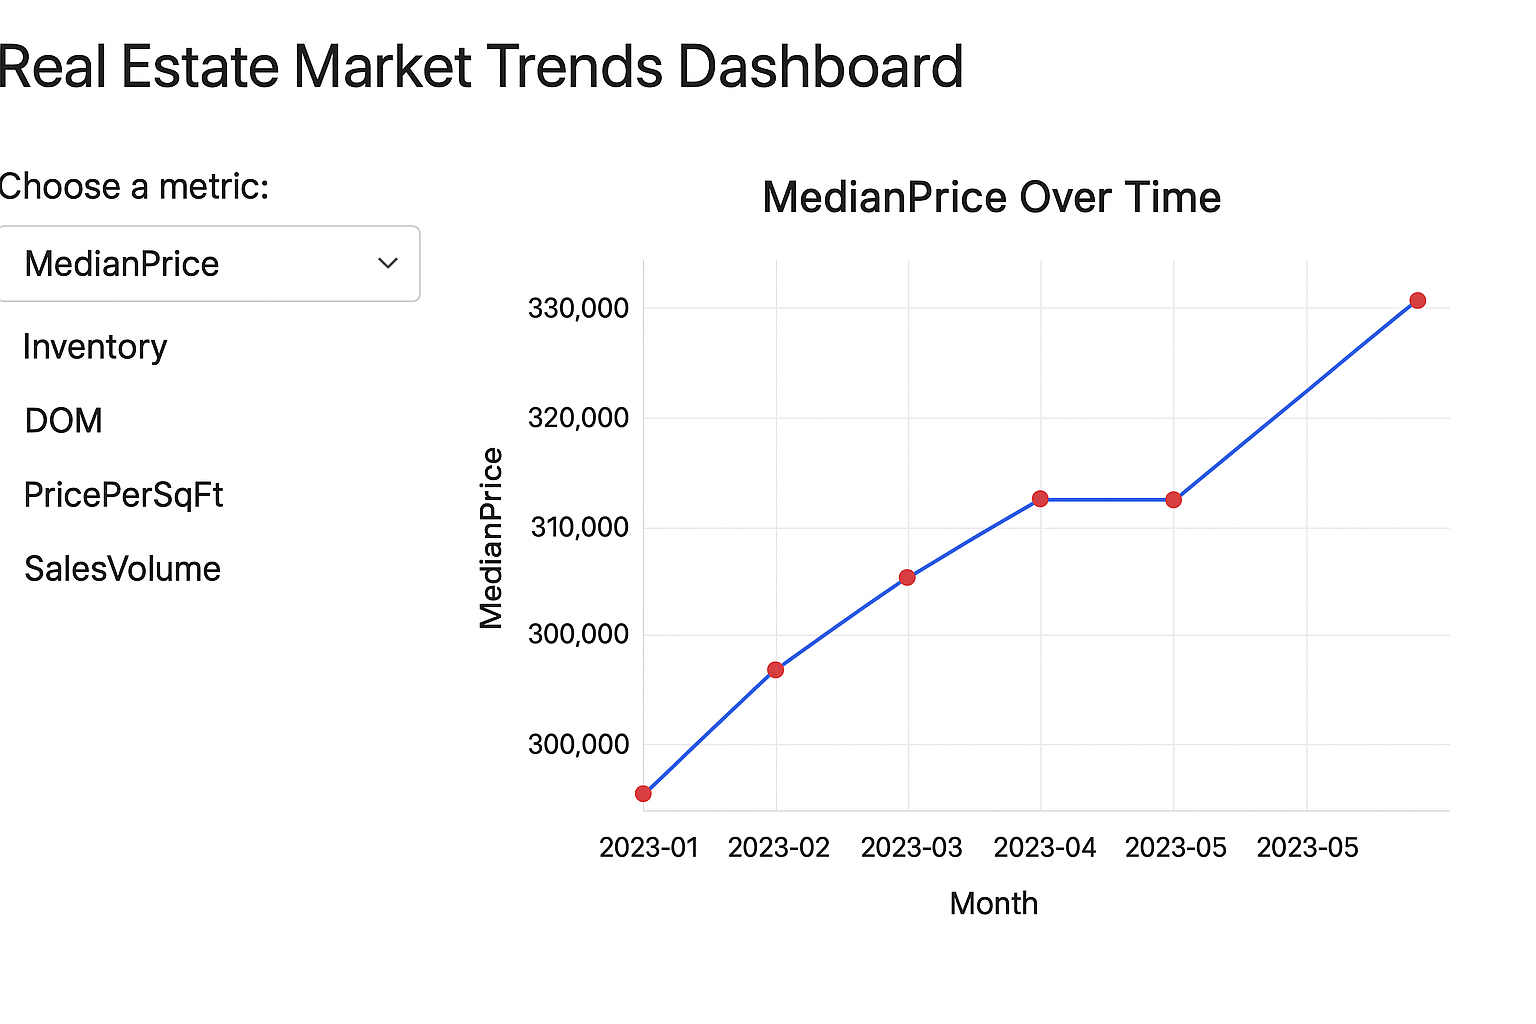
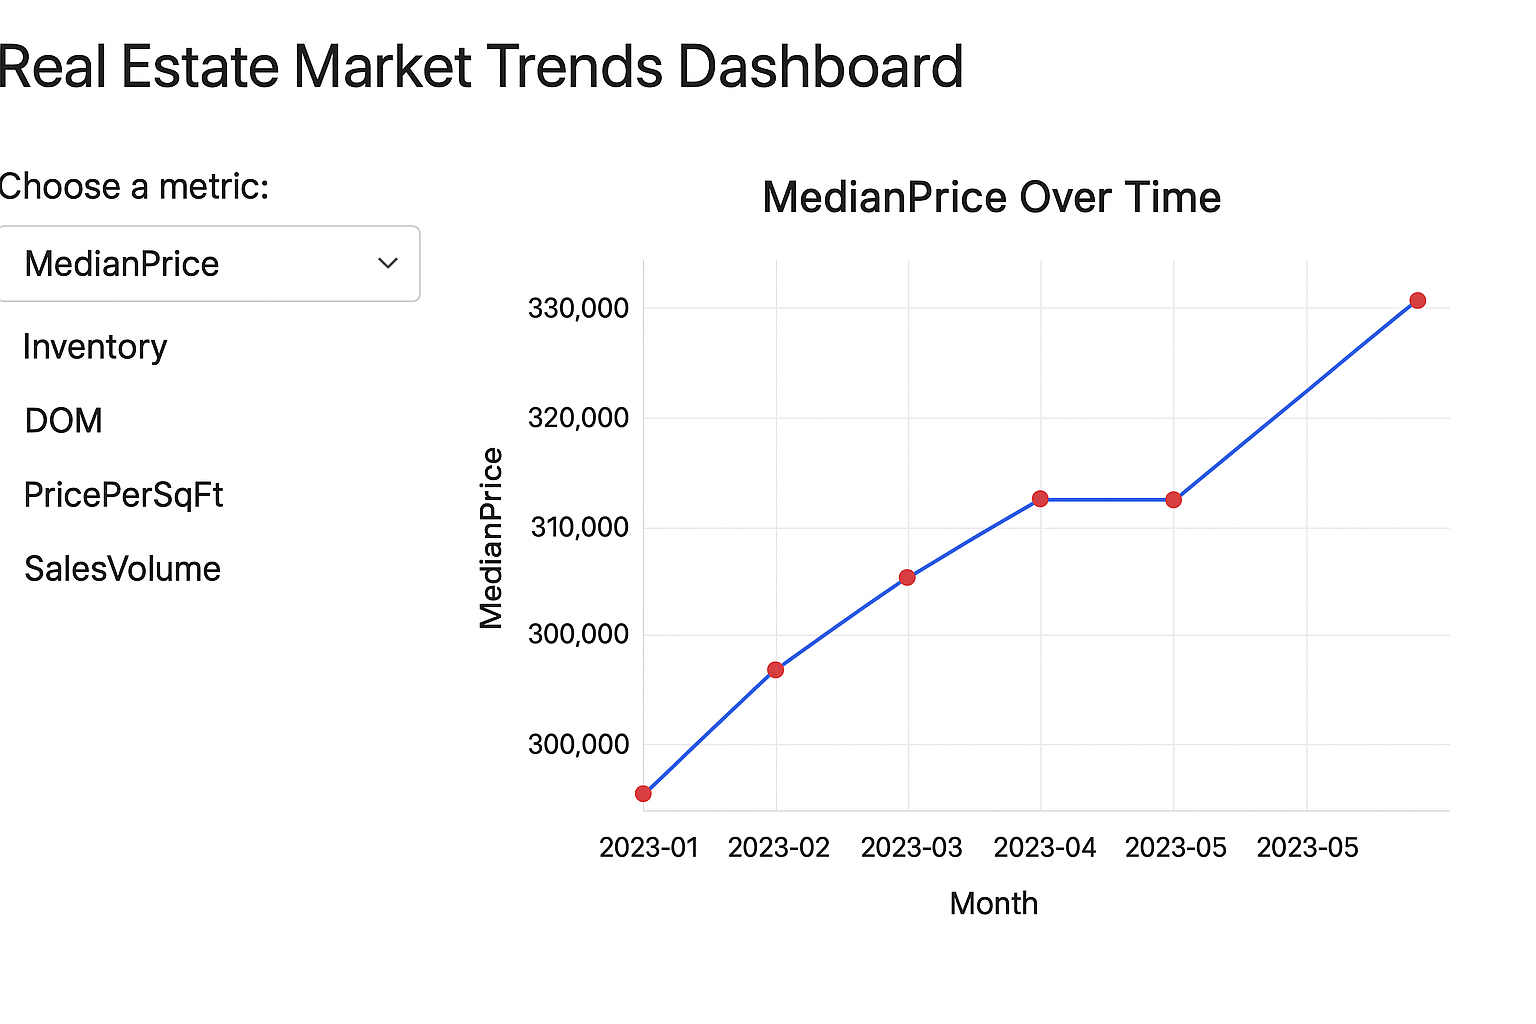

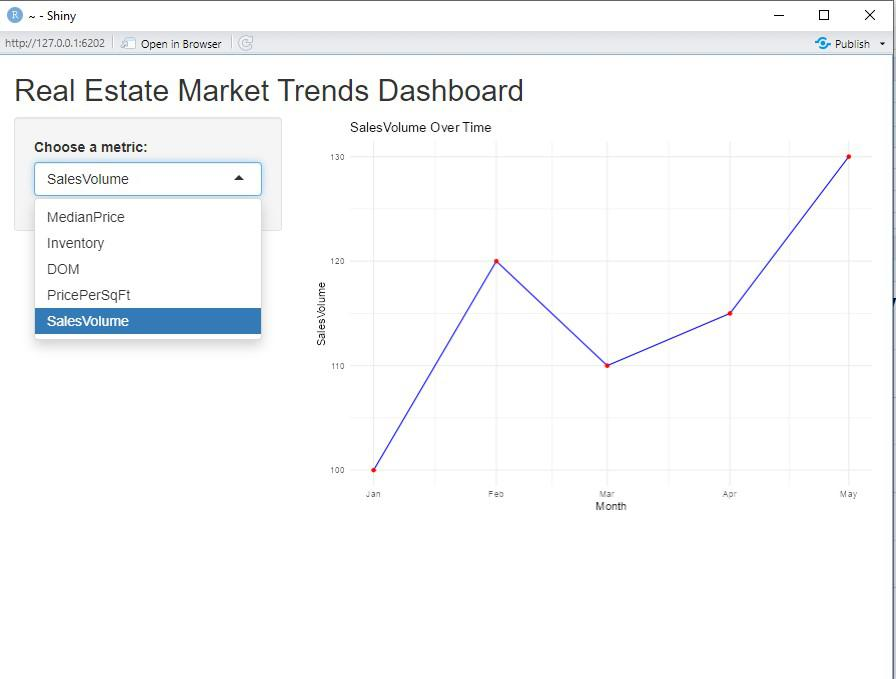
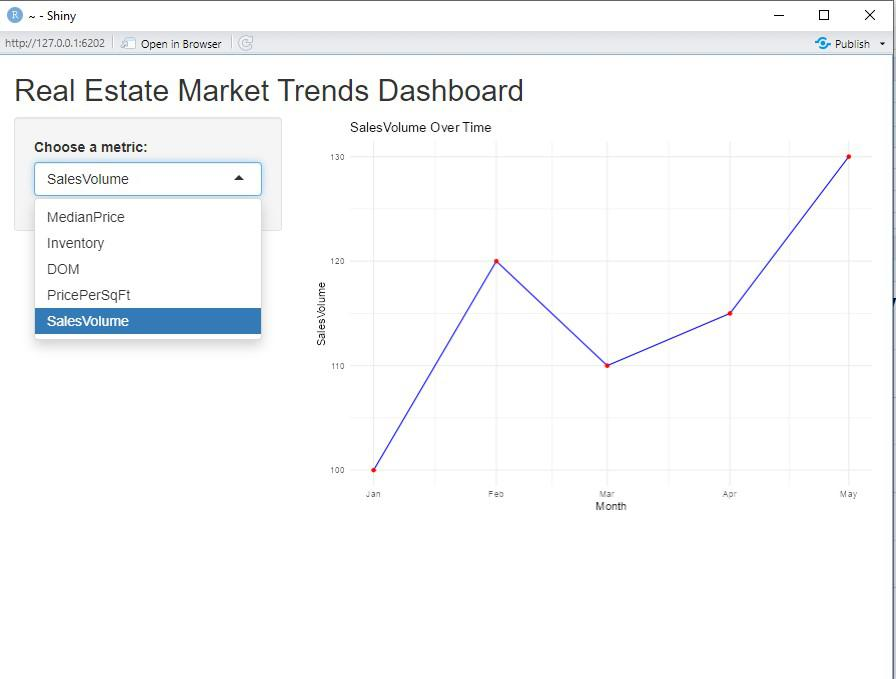
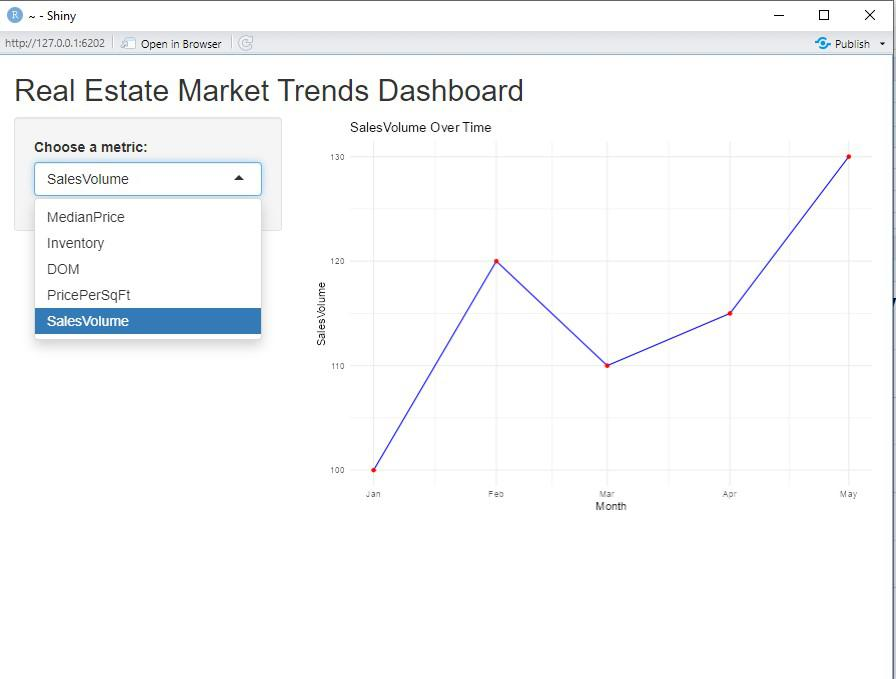
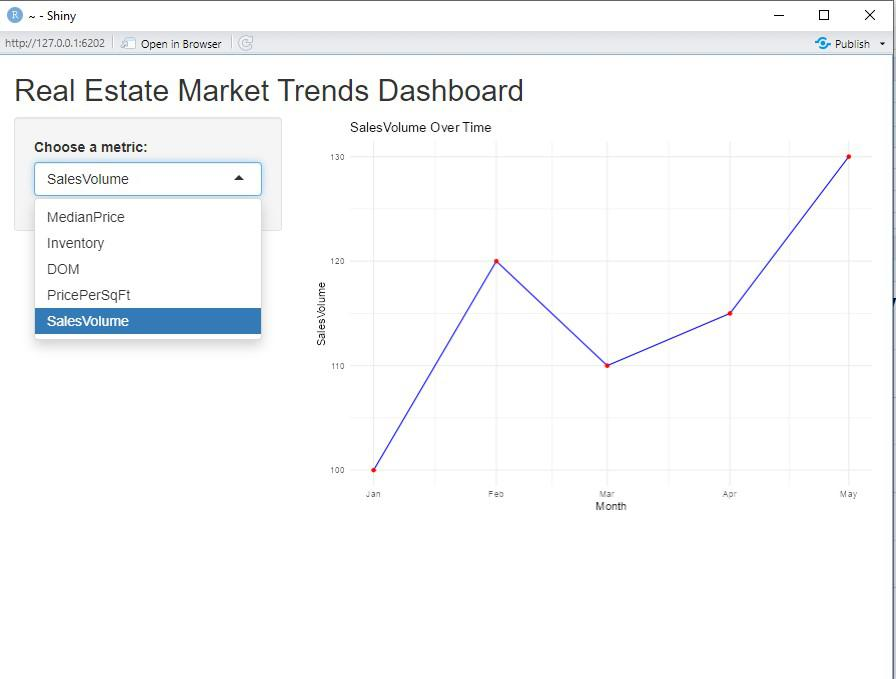

This shiny app allows users to interactively choose a metric to visualize. The line chart updates based on the selected metric, providing a flexible and dynamic view of the data.

Conclusion
From our dashboard, we can get:

* Key Insights: The dashboard visualizes critical metrics like median home prices, inventory levels, days on market, price per square foot, and sales volume.
* Dynamic Visualization: Using R and Shiny, the dashboard enables interactive exploration of data, helping stakeholders identify trends and changes over time.
* Informed Decision-Making: By analyzing these metrics, the dashboard assists in optimizing pricing strategies, making better investment decisions, and understanding overall market dynamics.